### Reference: <br>
Data science basics<br>
Doing Data Science<br>
By: Cathy O'Neil; Rachel Schutt<br>
Publisher: O'Reilly Media, Inc.<br>
Pub. Date: October 24, 2013<br>
Print ISBN-13: 978-1-4493-5865-5<br>
Chapter 3 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/databases/9781449363871

Python Data Science Handbook <br>
Essential Tools for Working with Data <br>
By Jake VanderPlas<br>
Publisher: O'Reilly Media <br>
Release Date: November 2016 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/programming/python/9781491912126 <br>
K_means example discussed in the notebook is adapted from the code accompanied with this text: <br>

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### K-Means Clustering

#### Unsupervised Learning
In supervissed learning we build a model by sample data (training set), where we know beforehand what is the value for the outcome variable (for example, regression). In other words, we have labeled data for training. On the other hand, in the unsupervised learning we try to find patterns or grouping in un-labeled data.

"K-Means is an example of unsupervised learning technique, where the goal of the algorithm is to find grouping in un-labeled data"

#### Centroid for a set of d-dimensional points
Example: Three 2-dimensional points   $(2,5), (1,7), (3, 9)$. The centroid for this set is: $((2+1+3)/3,  (5+7+9)/3) = (2, 7)$

The outline of the algorithm for clustering d-dimensional points is given below.

<ul>
<li>Initially, randomly pick k centroids (or points that will be the center of your clusters) in d-space. 
<li> Then assign each data point to the closest centroid.
<li> Update the centroids by taking averages of data points assigned to it.
<li> Repeat the preceding two steps until the assignments don’t change, or change very little.
</ul>



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

#### Assign each data point to the closest centroid

Consider three points $x_0$, $x_1$, and $x_2$;  and two centroid $y_0$ and $y_1$.

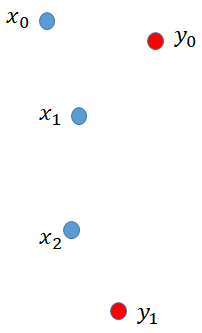


If dist($x_0$,$y_0$) <  dist($x_0$,$y_1$)  assign $x_0$ a label $0$ to indicate it is assigned to $y_0$

If dist($x_1$,$y_0$) <  dist($x_1$,$y_1$)  assign $x_1$ a label $0$ to indicate it is assigned to $y_0$

If dist($x_2$,$y_1$) <  dist($x_2$,$y_0$)  assign $x_2$ a label $1$ to indicate it is assigned to $y_1$

One naive way to do this computation is to set up a nested loop, where the outer loop is over the number of samples (x's), and in the inner loop is over the number of centroids (clusters).

The main computation is to compute the Euclidean distance between a point with a centroid and keep track of the centroid with the minimum distance. 

Performing this computation by setting up nested loop can be very slow. As a general rule perform numpy array operation wherever possible. 

Now we look at an efficient way of doing this computation.


In [2]:
# Generate 7 3-d samples
X = np.random.randint(10, size=(7,3))

In [3]:
X

array([[5, 9, 4],
       [7, 5, 6],
       [1, 4, 0],
       [8, 7, 8],
       [6, 7, 2],
       [4, 0, 3],
       [8, 4, 0]])

In [4]:
# Generate 4 3-d samples (centroids)
Y = np.random.randint(10, size=(4,3))

In [5]:
Y

array([[5, 4, 5],
       [3, 0, 0],
       [3, 8, 2],
       [4, 4, 1]])

First we compute a distance matrix of size $7 \times 4$ where an entry $d_{ij}$ is the Euclidean distance between sample $x_i$ with centroid $y_j$.

Note that Euclidean distance between $x_i = (x_i^0, x_i^1, x_i^2)$  with $y_j = (y_i^0, y_i^1, y_i^2)$ is given by:

$d_{ij} = \sqrt{(x_i - y_j)^2)} =  \sqrt{(x_i^0 - y_j^0)^2 + (x_i^1 - y_j^1)^2 + (x_i^2 - y_j^2)^2  }$

$d_{ij} = \sqrt{(x_i^0)^2 + (x_i^1)^2 + (x_i^2)^2 + (y_j^0)^2 + (y_j^1)^2 + (y_j^2)^2 - 2(x_i^0y_j^0 + x_i^1y_j^1 + x_i^2y_j^2)}$ 

Exercise: Write the expression for every element of  the first row of the $d_{ij}$  matrix of size $7 times 4$:

$d_{00} =     \sqrt{(x_0^0 - y_0^0)^2 + (x_0^1 - y_0^1)^2 + (x_0^2 - y_0^2)^2  }$

$d_{01} =  \sqrt{(x_0^0 - y_1^0)^2 + (x_0^1 - y_1^1)^2 + (x_0^2 - y_1^2)^2  }$

$d_{02} =  \sqrt{(x_0^0 - y_2^0)^2 + (x_0^1 - y_2^1)^2 + (x_0^2 - y_2^2)^2  }$

$d_{03} =  \sqrt{(x_0^0 - y_3^0)^2 + (x_0^1 - y_3^1)^2 + (x_0^2 - y_3^2)^2  }$

Identify the compuation that can be reused in evaluating these terms.

Exercise: Write the expression for every element of  the first column of the $d_{ij}$  matrix of size $7 times 4$:

$d_{00} =  $ 

$d_{10} =  $

$d_{20} =  $

$d_{30} =  $

Identify the compuation that can be reused in evaluating these terms.

In [6]:
print(X)

[[5 9 4]
 [7 5 6]
 [1 4 0]
 [8 7 8]
 [6 7 2]
 [4 0 3]
 [8 4 0]]


In [7]:
x2 = np.sum(X**2, axis=1)


In [8]:
x2

array([122, 110,  17, 177,  89,  25,  80], dtype=int32)

In [9]:
x2 = np.sum(X**2, axis=1).reshape((7,1))
x2

array([[122],
       [110],
       [ 17],
       [177],
       [ 89],
       [ 25],
       [ 80]], dtype=int32)

In [10]:
y2 = np.sum(Y**2, axis=1).reshape((1, 4))
print (np.shape(y2))

(1, 4)


In [11]:
print (np.shape(X))
print (np.shape(Y.T))
xy = X.dot(Y.T)

(7, 3)
(3, 4)


In [12]:
print (np.shape(xy))

(7, 4)


In [13]:
dists = np.sqrt(x2 + y2 - 2*xy)

In [14]:
dists

array([[ 5.09901951, 10.04987562,  3.        ,  5.91607978],
       [ 2.44948974,  8.77496439,  6.40312424,  5.91607978],
       [ 6.40312424,  4.47213595,  4.89897949,  3.16227766],
       [ 5.19615242, 11.74734012,  7.87400787,  8.60232527],
       [ 4.35889894,  7.87400787,  3.16227766,  3.74165739],
       [ 4.58257569,  3.16227766,  8.1240384 ,  4.47213595],
       [ 5.83095189,  6.40312424,  6.70820393,  4.12310563]])

Exercise: Compute the distance matrix by explicitly broadcasting the arrays before performing array operations (please review Numpy I notebook). In other words when you perform the array operation, dists = np.sqrt(x2 + y2 - 2*xy), all arrays should have the same shape.

In [15]:
y2b = np.array([y2[0,:],]*7)
print (np.shape(y2b))
x2b = np.array([x2[:,0]]*4).transpose()
print(np.shape(x2b))
dists = np.sqrt(x2b + y2b - 2*xy)
print(dists)

(7, 4)
(7, 4)
[[ 5.09901951 10.04987562  3.          5.91607978]
 [ 2.44948974  8.77496439  6.40312424  5.91607978]
 [ 6.40312424  4.47213595  4.89897949  3.16227766]
 [ 5.19615242 11.74734012  7.87400787  8.60232527]
 [ 4.35889894  7.87400787  3.16227766  3.74165739]
 [ 4.58257569  3.16227766  8.1240384   4.47213595]
 [ 5.83095189  6.40312424  6.70820393  4.12310563]]


In [16]:
labels = np.argmin(dists, axis=1)
labels

array([2, 0, 3, 0, 2, 1, 3], dtype=int64)

### Compute labels using 

In [17]:
from sklearn.metrics import pairwise_distances_argmin
labels = pairwise_distances_argmin(X, Y)
labels

array([2, 0, 3, 0, 2, 1, 3], dtype=int64)

###  Complete Algorithm for finding clusters using k means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


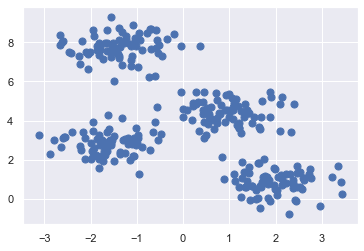

In [18]:
# Generate 2-d samples which can be clustered nicely
from sklearn.datasets.samples_generator import make_blobs
X, _ = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [19]:
# Randomly choose initial 4  clusters (centroids)
n_clusters = 4
i = np.random.choice(X.shape[0], n_clusters, replace=False)
Y = X[i]

In [20]:
Y

array([[-1.45672617,  7.48669893],
       [-1.8146975 ,  3.29009724],
       [-1.60496819,  2.9742542 ],
       [-0.97598663,  6.73761577]])

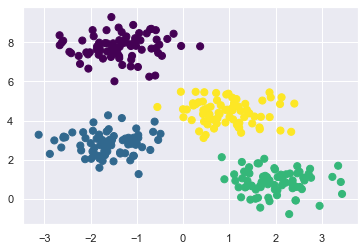

In [21]:
while True:
    # Assign labels based on closest centroids
    labels = pairwise_distances_argmin(X, Y)

    # Update centroids by averaging data points assigned to it 
    Y_new = np.array([X[labels == i].mean(0)
                            for i in range(n_clusters)])

    # Check for convergence
    if np.all(Y == Y_new):
        break
    Y = Y_new

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [22]:
labels

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1], d

In [23]:
print (np.shape(X))
Temp = X[labels == 0]
print (np.shape(Temp))

(300, 2)
(75, 2)


In [24]:
# New Y_0
Temp.mean(0)

array([-1.37324398,  7.75368871])

### Using Scikit Package

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)

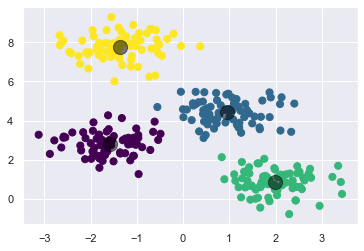

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [27]:
import seaborn as sns
from sklearn import datasets

In [28]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
irisn = iris.drop(['species'], axis=1)
irisn.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
X = irisn.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Exercise: Repeat the clustering algorithm for Iris 4-d dataset for k = 3. 

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
labels = kmeans.predict(X1)

In [70]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [63]:
labels.shape

(150,)

In [40]:
plt.scatter?

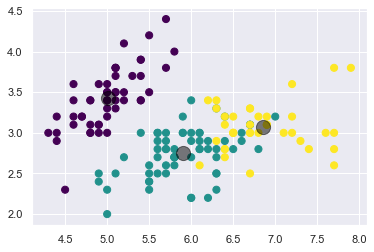

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);